In [ ]:
STAC_URL = "https://stac.marine.copernicus.eu/metadata/catalog.stac.json"

import pystac

catalog = pystac.Catalog.from_file(STAC_URL)
desired_id = 'INSITU_GLO_PHY_TS_OA_MY_013_052'
childs = catalog.get_child_links()
# Find the child link with the specific ID
child_link = next((child for child in childs if child.title == desired_id), None)

child_collection = pystac.Collection.from_file(child_link)
item = child_collection.get_item('cmems_obs-ins_glo_phy-temp-sal_my_cora-oa_P1M_202411')

In [ ]:
import xarray as xr

selected_asset = item.assets['timeChunked'].href
ds = xr.open_zarr(selected_asset)

In [ ]:
ds = ds.isel(elevation = 186)
# Subset the dataset
subset_brittany = ds.sel(
    latitude=slice(46, 49),  # Xarray uses descending order for slices
    longitude=slice(-10, -4),
)
subset_biscay = ds.sel(
    latitude=slice(43.4, 48.1),  # Xarray uses descending order for slices
    longitude=slice(-5.8, -1),
)
subset_channel = ds.sel(
    latitude=slice(48.8, 50.7),  # Xarray uses descending order for slices
    longitude=slice(-7, 1.6),
)
subset_med = ds.sel(
    latitude=slice(41.3, 43.3),  # Xarray uses descending order for slices
    longitude=slice(3, 8.85),
)

In [ ]:
import xarray as xr
#import matplotlib.pyplot as plt

# Assuming 'ds' is your dataset
# Step 1: Calculate annual mean for all dimensions
annual_mean_brittany = subset_brittany['TEMP'].groupby('time.year').mean(dim=['time','latitude', 'longitude'])
annual_mean_biscay = subset_biscay['TEMP'].groupby('time.year').mean(dim=['time','latitude', 'longitude'])
annual_mean_channel = subset_channel['TEMP'].groupby('time.year').mean(dim=['time','latitude', 'longitude'])
annual_mean_med = subset_med['TEMP'].groupby('time.year').mean(dim=['time','latitude', 'longitude'])


In [ ]:
annual_mean_brittany

<xarray.DataArray 'TEMP' (year: 64)>
dask.array<groupby_nanmean, shape=(64,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    elevation  float32 -1.0
  * year       (year) int64 1960 1961 1962 1963 1964 ... 2020 2021 2022 2023
Attributes:
    long_name:      Temperature 
    regrid_method:  bilinear
    standard_name:  sea_water_temperature
    units:          degree_Celsius
    valid_max:      20000
    valid_min:      -23000

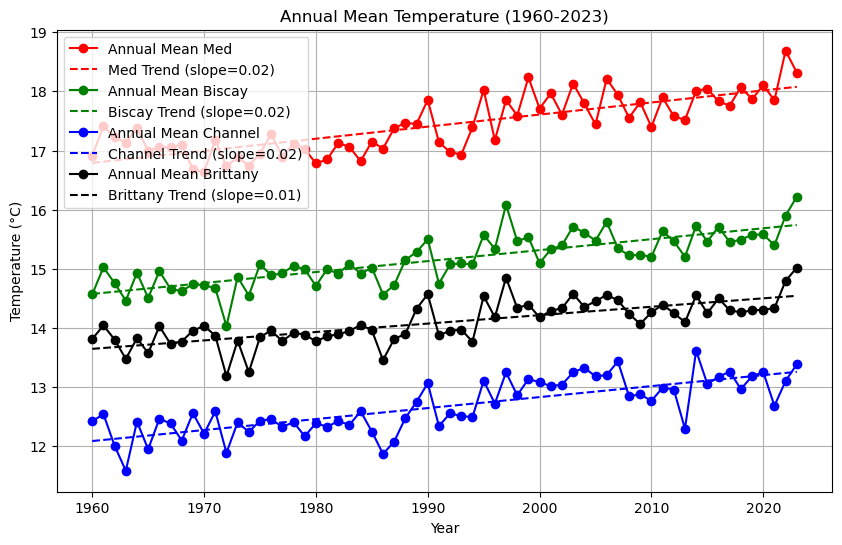

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define a function to add linear regression
def add_regression_line(x, y, color, label):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    plt.plot(x, slope * x + intercept, linestyle='--', color=color, label=f'{label} Trend (slope={slope:.2f})')


# Step 2: Plot the annual mean
plt.figure(figsize=(10, 6))
# Plot the data and their regression lines
x_med = annual_mean_med.coords['year'].values  # Assuming the index is years
y_med = annual_mean_med.values
plt.plot(x_med, y_med, label='Annual Mean Med', marker='o', color='red')
add_regression_line(x_med, y_med, 'red', 'Med')

x_biscay = annual_mean_biscay.coords['year'].values
y_biscay = annual_mean_biscay.values
plt.plot(x_biscay, y_biscay, label='Annual Mean Biscay', marker='o', color='green')
add_regression_line(x_biscay, y_biscay, 'green', 'Biscay')

x_channel = annual_mean_channel.coords['year'].values
y_channel = annual_mean_channel.values
plt.plot(x_channel, y_channel, label='Annual Mean Channel', marker='o', color='blue')
add_regression_line(x_channel, y_channel, 'blue', 'Channel')

x_brittany = annual_mean_brittany.coords['year'].values
y_brittany = annual_mean_brittany.values
plt.plot(x_brittany, y_brittany, label='Annual Mean Brittany', marker='o', color='black')
add_regression_line(x_brittany, y_brittany, 'black', 'Brittany')


plt.title('Annual Mean Temperature (1960-2023)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')  # Adjust unit as per your dataset
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# Step 2: Select summer months (June, July, August)
summer_months_biscay = subset_biscay['TEMP'].where(subset_biscay['time'].dt.month.isin([6, 7, 8, 9]), drop=True)
summer_months_channel = subset_channel['TEMP'].where(subset_channel['time'].dt.month.isin([6, 7, 8, 9]), drop=True)
summer_months_med = subset_med['TEMP'].where(subset_med['time'].dt.month.isin([6, 7, 8, 9]), drop=True)
summer_months_brittany = subset_brittany['TEMP'].where(subset_brittany['time'].dt.month.isin([6, 7, 8, 9]), drop=True)

# Step 3: Group by year and compute the mean over summer months
summer_mean_biscay = summer_months_biscay.groupby('time.year').mean(dim=['time', 'latitude', 'longitude'])
summer_mean_channel = summer_months_channel.groupby('time.year').mean(dim=['time', 'latitude', 'longitude'])
summer_mean_med = summer_months_med.groupby('time.year').mean(dim=['time', 'latitude', 'longitude'])
summer_mean_brittany = summer_months_brittany.groupby('time.year').mean(dim=['time', 'latitude', 'longitude'])


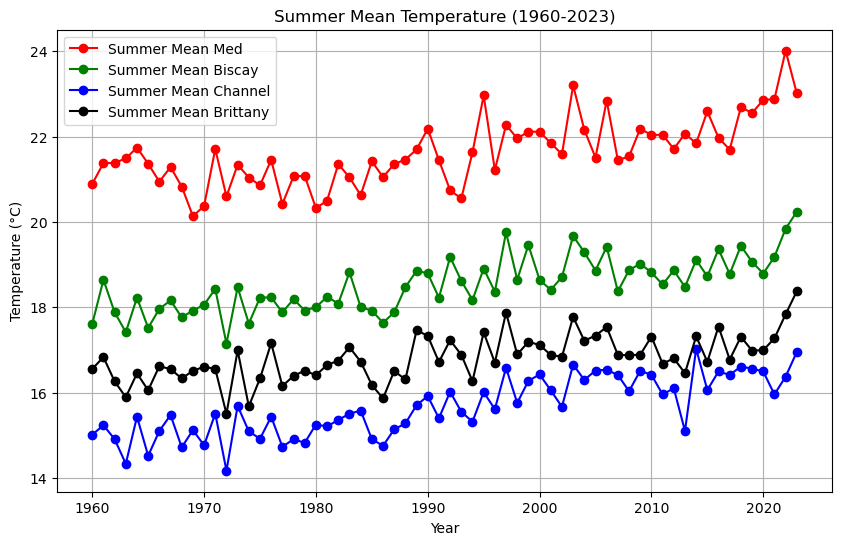

In [ ]:
# Step 2: Plot the annual mean
plt.figure(figsize=(10, 6))
summer_mean_med.plot(label='Summer Mean Med', marker='o', color='red')
summer_mean_biscay.plot(label='Summer Mean Biscay', marker='o', color='green')
summer_mean_channel.plot(label='Summer Mean Channel', marker='o', color='blue')
summer_mean_brittany.plot(label='Summer Mean Brittany', marker='o', color='black')
#annual_mean_s.plot(label='Annual Mean TEMP', marker='x', color='red')
plt.title('Summer Mean Temperature (1960-2023)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')  # Adjust unit as per your dataset
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
subset_med1 = subset_med.isel(time=63)
subset_brittany1 = subset_brittany.isel(time=63)
subset_channel1 = subset_channel.isel(time=63)
subset_biscay1 = subset_biscay.isel(time=63)

tempm = subset_med1['TEMP']
tempbis = subset_biscay1['TEMP']
tempb = subset_brittany1['TEMP']
tempc = subset_channel1['TEMP']

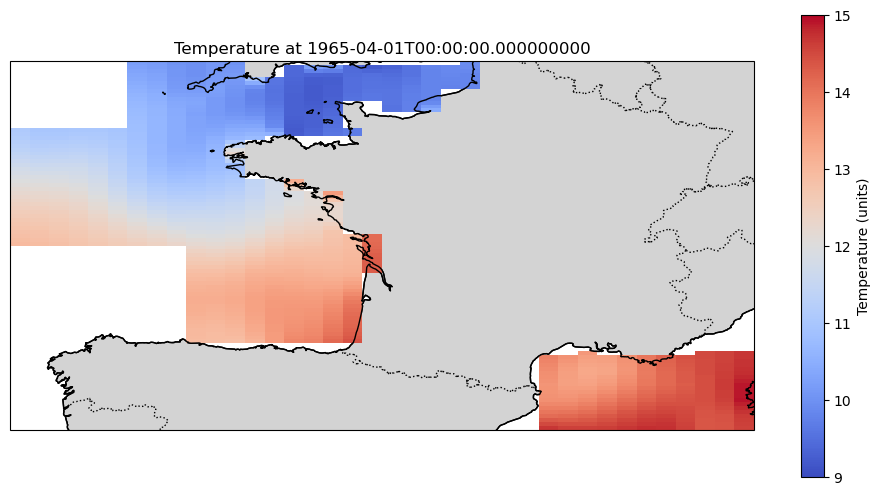

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

vmin, vmax = 9, 15

# Set up the plot
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(12, 6))
# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, edgecolor="black", facecolor="lightgrey")
# Plot the 2D map
tempm.plot(
    cmap="coolwarm",
    vmin=vmin,
    vmax=vmax,
    add_colorbar=False
)
tempbis.plot(
    cmap="coolwarm",
    vmin=vmin,
    vmax=vmax,
    add_colorbar=False
)
tempb.plot(
    cmap="coolwarm",
    vmin=vmin,
    vmax=vmax,
    add_colorbar=False
)
tempc.plot(
    cmap="coolwarm",
    vmin=vmin,
    vmax=vmax,
    add_colorbar=False
)

# Add a single colorbar
cbar = fig.colorbar(
    plt.cm.ScalarMappable(cmap="coolwarm", norm=plt.Normalize(vmin=vmin, vmax=vmax)),
    ax=ax,
    orientation="vertical",
    label="Temperature (units)"
)

plt.title(f"Temperature at {str(tempm.time.values)}")
plt.show()